### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [6]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [3]:
sample_height_coffee_yes = []
sample_height_coffee_no = []
sample_height_coffee_dif = []
for i in range(10000):
    x = sample_data.sample(200,replace=True)
    sample_height_coffee_no.append(x[x.drinks_coffee == False].height.mean())
    sample_height_coffee_yes.append(x[x.drinks_coffee == True].height.mean())
    sample_height_coffee_dif.append(x[x.drinks_coffee == True].height.mean()-x[x.drinks_coffee == False].height.mean())

In [5]:
np.percentile(sample_height_coffee_dif,0.5),np.percentile(sample_height_coffee_dif,99.5)

(0.10258900080919674, 2.5388333707966284)

(array([   24.,   109.,   546.,  1516.,  2623.,  2826.,  1664.,   568.,
          106.,    18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <a list of 10 Patch objects>)

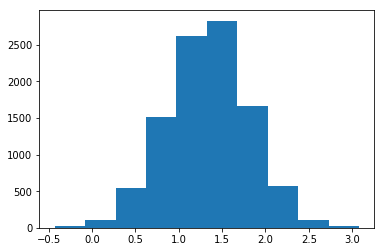

In [17]:
plt.hist(sample_height_coffee_dif)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [7]:
sample_height_age21_yes = []
sample_height_age21_no = []
sample_height_age21_dif = []
for i in range(10000):
    x = sample_data.sample(200,replace=True)
    sample_height_age21_no.append(x[x.age == '<21'].height.mean())
    sample_height_age21_yes.append(x[x.age == '>=21'].height.mean())
    sample_height_age21_dif.append(x[x.age == '>=21'].height.mean()-x[x.age == '<21'].height.mean())
    

In [8]:
np.percentile(sample_height_age21_dif,0.5),np.percentile(sample_height_age21_dif,99.5)

(3.3652749452554089, 5.0932450670660936)

(array([    8.,    47.,   329.,  1196.,  2589.,  3083.,  1903.,   714.,
          117.,    14.]),
 array([ 2.84743507,  3.11400025,  3.38056542,  3.64713059,  3.91369577,
         4.18026094,  4.44682611,  4.71339129,  4.97995646,  5.24652163,
         5.51308681]),
 <a list of 10 Patch objects>)

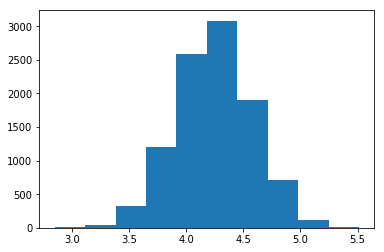

In [18]:
plt.hist(sample_height_age21_dif)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [19]:

sample_height_age21_coffe_dif = []
for i in range(10000):
    x = sample_data.sample(200,replace=True)
    sample_height_age21_coffe_dif.append(-x[(x.age == '<21') & (x.drinks_coffee == False)].height.mean()+x[(x.age == '<21') & (x.drinks_coffee == True)].height.mean())
    

In [12]:
np.percentile(sample_height_age21_coffe_dif,2.5),np.percentile(sample_height_age21_coffe_dif,97.5)

(1.4527117803479186, 3.1367172126082696)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [15]:
sample_height_age21_coffee_dif = []
for i in range(10000):
    x = sample_data.sample(200,replace=True)
    sample_height_age21_coffee_dif.append(x[(x.age == '>=21') & (x.drinks_coffee == False)].height.mean()-x[(x.age == '>=21') & (x.drinks_coffee == True)].height.mean())
    

In [16]:
np.percentile(sample_height_age21_coffee_dif,2.5),np.percentile(sample_height_age21_coffee_dif,97.5)

(1.8482176570248883, 4.4235646586174928)